In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [54]:
def chiS(phi, N1, N2):
    return((1/(1-phi)/N1 + 1/phi/N2)/2)

### Question 1
We are asked to graph the spinodal curve for a polymer of 100 Kuhn steps in various solvents. The function above defines the $\chi_s$ in terms of the volume fraction of the polymer, $\phi_1$. We should note that this function takes in parameter N which is the size of the polymer relative to the solvent. This is the result of Flory-Huggins theory which is based on the number of lattice sites occupied by the molecules and each lattice site is defined as the volume that the smallest molecule takes up. In our graphs we see that the larger the N the smaller the critical $\phi_1$ We should note that the difference between graph 1 and 2 is less than obvious because we have put the graphs on the same y axis so the difference appears most clearly in the x bounds which are [0.001,0.9] for graph 1, [0.01, 0.9] for graph 2 and [0.1,0.9] for graph 3. The difference between graphs 1 and 2 vs. graph 3 are much more clear where graph 3 is clearly symettric becasue the size of the polymer and solvent are the same size.

Text(0.5, 0, 'volume frac polymer')

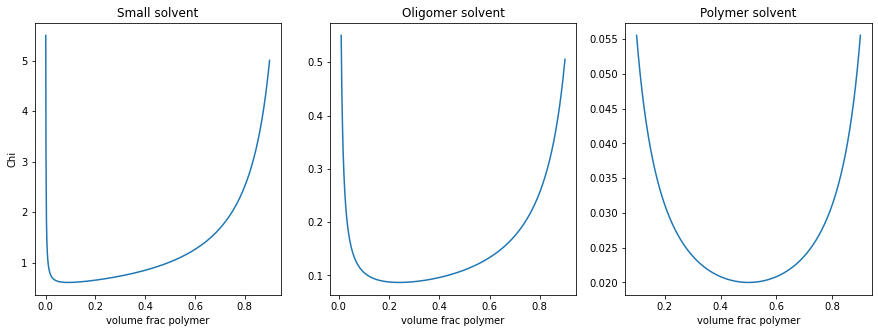

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))

x = np.linspace(0.001,0.9,999) #note that we are changing the x bounds to show the difference in solvents
y1 = chiS(x, 1, 100)
ax1.plot(x,y1)
ax1.set_title('Small solvent')
ax1.set_ylabel('Chi')
ax1.set_xlabel('volume frac polymer')

x2 = np.linspace(0.01, 0.9, 999)
y2 = chiS(x2, 10, 100)
ax2.plot(x2,y2)
ax2.set_title('Oligomer solvent')
ax2.set_xlabel('volume frac polymer')

x3 = np.linspace(0.1,0.9,999)
y3 = chiS(x3, 100, 100)
ax3.plot(x3,y3)
ax3.set_title('Polymer solvent')
ax3.set_xlabel('volume frac polymer')

We can now demonstrate the expected value for the symettric case where we know that the critical chi value should be XN = 2

In [58]:
print('Chi times N is:', np.amin(y3)*100)

Chi times N is: 2.0


### Question 3
#### Part A
The easiest way to think of this problem is to recall the premise of Flory-Huggins theory that treats polymers as a "monomer soup". We are now going to make a critical assumption that both the A and B monomers take up exactly one lattice site. This is important because it means that we can treat the number of lattice sites occupied by A as the total number of A monomers and the same is true of B. This means that our modification for the enthalpy term should now be:
$$\frac{H_1}{RT} = \chi_{AB}(x \phi_1)((1-x) \phi_1 + \phi_2)$$

#### Part B
Now if we modify the pure melt equation in the same way:
$$\frac{H_0}{RT} = \chi_{AB}(x \phi_1)((1-x) \phi_1)$$

#### Part C
And finally if we substract part B from part A we get:
$$\frac{\Delta G}{RT} = (H_1-H_0)- T\Delta S=\phi_1 ln(\phi_1) + \phi_2 ln(\phi_2) + \chi_{AB} \phi_1 \phi_2 x$$
which means that we can lump $\chi_{eff} = \chi_{AB}x$ into a single paramater and finally we have:
$$\frac{\Delta G}{RT} = \phi_1 ln(\phi_1) + \phi_2 ln(\phi_2) + \chi_{eff} \phi_1 \phi_2$$

### Question 4
#### Part A
As we derived in class $d \cdot A = 2 \cdot C \cdot V$ where d is the plane spacing, A is the area, C is the number of chains, V is the volume of a chain. Thus the number of chains per interfacial area is:
$$\frac{C}{A} = \frac{d}{2(Nb)^3}$$

#### Part B
We are now asked to find the energy of streching per chain which means we can start with the gamma term we are given:
$$\gamma \; \alpha \; \frac{\chi^{1/2}k_bT}{b^2}$$
Now if we want to get energy per chain then we should multiply by the inverse of our answer for part A which us:
$$\frac{energy}{chain} = \frac{2 \chi^{1/2}k_bTN^3b}{d}$$

#### Part C
We know that the entropy of streching the chain is the same as the force to strech the chain because the vast majority of the configuational energy in polymers is due to entropy. We derived the equation for the force to strech a FJC polymer molecule. We now show the simpilified version, and note that if we wished to include the hyperbolic cotangent term then we would end up with an implict function which we could then solve with a non-linear solver if we desired. Because we are using the simplified version to solve explictly we should note this will only be a good approximation if d is significantly smaller than the contour length, which seems like a reasonable assumption unless A and B have extremely unfavorable interactions:
$$\frac{3k_bT}{Nb^2}d = \frac{2 \chi^{1/2}k_bTN^3b}{d}$$
$$d = (\frac{2}{3})^{1/2} \chi^{1/4} N^2b^{3/2}$$